<h2>1840s Clinical Maternal Data Examination</h2>

<p>Monthly Dataset Information</p>

In [98]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

monthly_data = pd.read_csv('monthly_deaths.csv')
annual_data = pd.read_csv('annual_deaths_by_clinic.csv')

dates = pd.to_datetime(monthly_data.date)
monthly_data.date = dates

monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [99]:
monthly_data.describe()[['births', 'deaths']]

,births,deaths
count,98.00,98.00
mean,267.00,22.47
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00
std,41.77,18.14


In [100]:
monthly_data.shape

(98, 3)

<p>Annual Dataset Information</p>

In [101]:
annual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [102]:
annual_data.describe()[['births', 'deaths']]

,births,deaths
count,12.00,12.00
mean,"3,152.75",223.33
std,449.08,145.38
min,"2,442.00",66.00
25%,"2,901.75",100.25
50%,"3,108.50",219.50
75%,"3,338.25",263.50
max,"4,010.00",518.00


In [103]:
annual_data.shape

(12, 4)

<h2>First Look Into Monthly Data</h2>

In [104]:
monthly_data

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


<h2>First Look Into Annual Data</h2>

In [105]:
annual_data

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


<h2>Likelihood of Maternal Death in the 1840s</h2>

In [106]:
likelihood = (annual_data.deaths.sum() / annual_data.births.sum()) * 100
likelihood = '{:,.2f}%'.format(likelihood)
print(likelihood)

7.08%


<h2>Annual Data With Percetage of Maternal Deaths Into Account</h2>

In [107]:
maternal_d = (annual_data.deaths / annual_data.births)

annual_data.insert(3, 'death_rate', maternal_d)
annual_data

,year,births,deaths,death_rate,clinic
0,1841,3036,237,0.08,clinic 1
1,1842,3287,518,0.16,clinic 1
2,1843,3060,274,0.09,clinic 1
3,1844,3157,260,0.08,clinic 1
4,1845,3492,241,0.07,clinic 1
5,1846,4010,459,0.11,clinic 1
6,1841,2442,86,0.04,clinic 2
7,1842,2659,202,0.08,clinic 2
8,1843,2739,164,0.06,clinic 2
9,1844,2956,68,0.02,clinic 2


<h2>Number of Monthly Births and Deaths</h2>

Text(0, 0.5, 'Deaths')

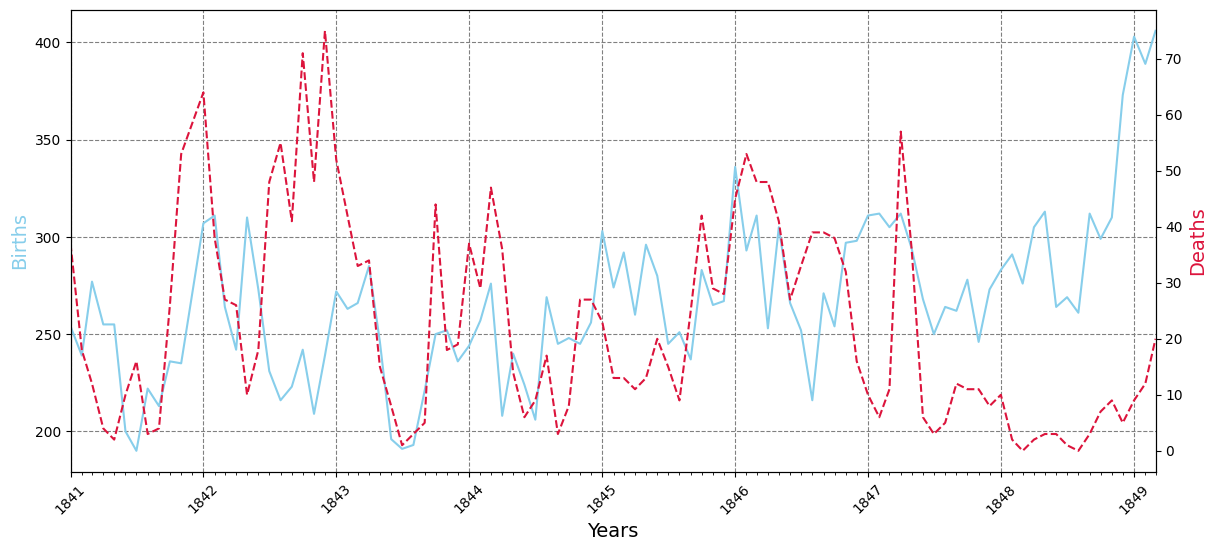

In [108]:
from matplotlib import dates
from matplotlib.pyplot import plot, figure, gca, grid
pd.options.display.float_format = '{:,.2f}'.format
figure(figsize=(14, 6))
months = dates.MonthLocator()

grid(axis='both', color='gray', linestyle='--')

ax1 = gca()
ax1.xaxis.set_minor_locator(months)
ax1.plot(monthly_data.date, monthly_data.births, color='skyblue')
ax1.set_xlabel('Years', fontsize=14)
ax1.set_ylabel('Births', fontsize=14, color='skyblue')
ax1.set_xlim(monthly_data.date.min(), monthly_data.date.max())
ax1.tick_params(axis='x', labelrotation=45)

ax2 = ax1.twinx()
ax2.plot(monthly_data.date, monthly_data.deaths, color='crimson', linestyle='--')
ax2.set_ylabel('Deaths', fontsize=14, color='crimson')

<h2>Number of Births Over Time by Maternity Clinic</h2>

In [109]:
import plotly.express as px

px.line(annual_data, x='year', y='births', color='clinic')

<h2>Number of Deaths Over Time by Maternity Clinic</h2>

In [110]:
px.line(annual_data, x='year', y='deaths', color='clinic')

<h2>Proportion of Deaths by Maternity Clinic</h2>

In [111]:
d_plot = px.line(annual_data, x='year', y=annual_data.death_rate, color='clinic')
d_plot.update_layout(xaxis_title='Years', yaxis_title='Proportion of Deaths', yaxis={'tickformat': '.2%'})

<h1>It was in June 1847 that Dr. Semmelweis realized that sickness and death would be prevented by the medical staff washing their hands and equipment.</h1>

<h2>Plotting Perentage of Deaths Before and After Handwashing Discovery</h2>

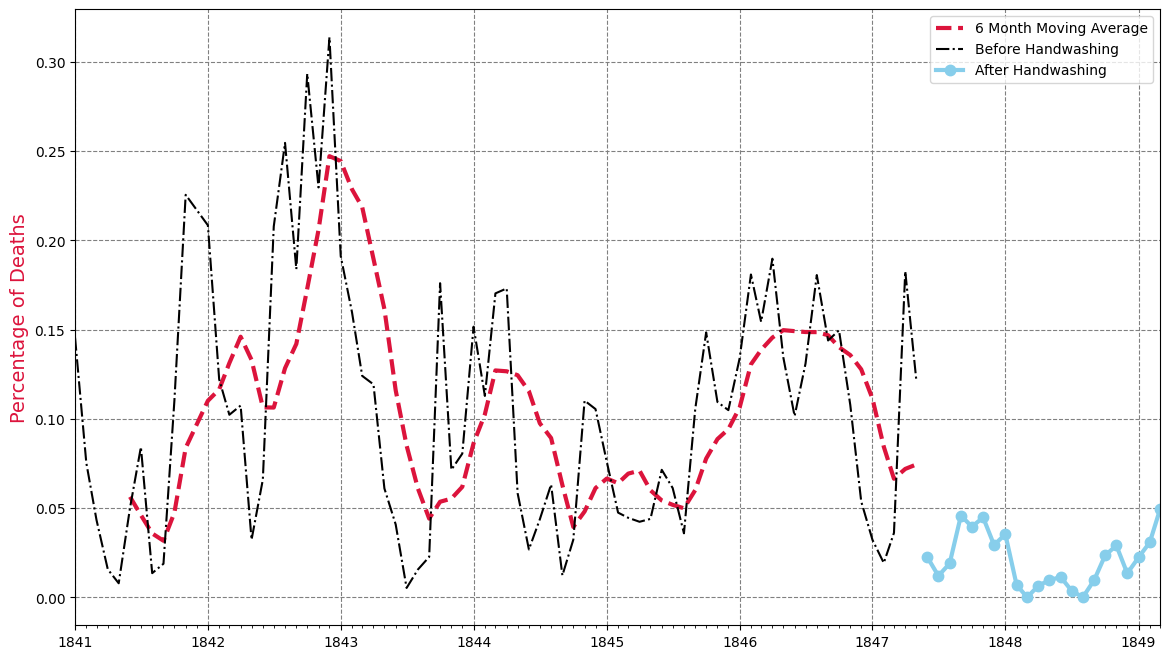

In [112]:
from matplotlib.pyplot import legend

fig = figure(figsize=(14, 8))
ax = gca()

grid(axis='both', color='gray', linestyle='--')

ax.plot(before_disc.date,
     before_disc.death_rate.rolling(6, min_periods=6).mean(),
     color='crimson',
     linestyle='--', linewidth=3)

ax.plot(before_disc.date,
     before_disc.death_rate, color='black',
     linestyle='-.')

ax.plot(after_disc.date,
        after_disc.death_rate,
        color='skyblue',
        marker='.',
        markersize=15,
        linewidth=3)

ax.set_xlim(before_disc.date.min(), after_disc.date.max())
ax.xaxis.set_minor_locator(months)
ax.set_ylabel('Percentage of Deaths', color='crimson', fontsize=14)



legend(['6 Month Moving Average', 'Before Handwashing', 'After Handwashing'])
fig.show()

<h2>Average Death Rate Before and After Discovery of Handwashing with Difference</h2>

In [113]:
monthly_dpct = monthly_data.deaths / monthly_data.births
monthly_data.insert(3, 'death_rate', monthly_dpct)

disc_row = monthly_data[monthly_data.date == pd.Timestamp('1847-06-01')]
disc_index = int(disc_row.index[0])
before_disc = monthly_data[monthly_data.index < disc_index]
after_disc = monthly_data[monthly_data.index >= disc_index]

b_rate = before_disc['death_rate'].mean()
a_rate = after_disc['death_rate'].mean()
diff = b_rate - a_rate

my_dict = {'death_rate': [a_rate, b_rate, diff]}
compare_df = pd.DataFrame(data=my_dict, index=['after_discovery', 'before_discovery', 'difference'])

compare_bar = px.bar(compare_df, x=compare_df.index, y='death_rate',
                     color=compare_df.index)

compare_bar.update_layout(yaxis={'tickformat': '.2%'})

compare_bar.show()

<h2>Box Plot Representation</h2>

In [141]:
import numpy as np

adates = np.array(monthly_data.date)
adates = np.where(adates < pd.Timestamp('1847-06-01'),
                  'No', 'Yes')

hw_data = pd.Series(adates)

# monthly_data.insert(4, 'Washing Hands?', hw_data)

drate_box = px.box(monthly_data, x='Washing Hands?', y='death_rate', color='Washing Hands?')
drate_box.update_layout(yaxis={'tickformat': '.2%'})
drate_box.show()


<h2>Histogram of Distribution of Monthly Deaths</h2>

In [147]:
dhist = px.histogram(monthly_data, x='death_rate',
                     color='Washing Hands?',
                     histnorm='percent',
                     nbins=30,
                     marginal='box',
                     barmode='overlay')

dhist.update_layout(xaxis_title='Proportion of Monthly Deaths', yaxis_title='Count')


<h2>Kernel Density Estimate Plot Representation</h2>

(0.0, 0.4)

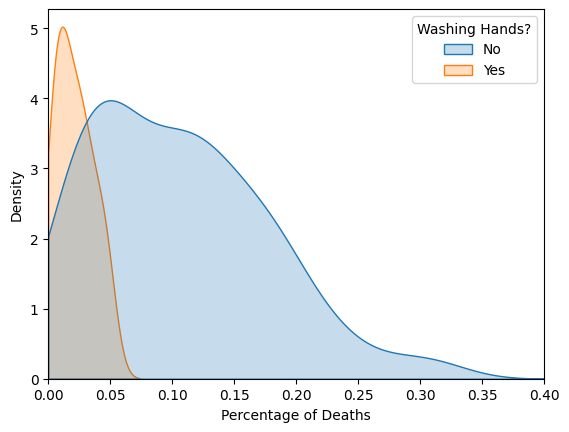

In [184]:
import seaborn as sb

kplot = sb.kdeplot(data=monthly_data, x='death_rate',
                   hue='Washing Hands?', fill='Washing Hands?',
                   clip=(0, 1))

kplot.set(xlabel='Percentage of Deaths')

kplot.set_xlim(0, 0.4)

<h2>T-Test Between Death Rate Samples to Determine Significance of Handwashing</h2>
<p>If value is below 1%, there is high certainty that handwashing has drastically sustained the lives and care of maternity patients.</p>

In [195]:
from scipy import stats

result = stats.ttest_ind(before_disc.death_rate, after_disc.death_rate)
print("{:.10f}".format(result.pvalue))

0.0000002985
